### Validación Cruzada (Cross-Validation)

Situación: Eres un científico de datos en una startup de salud. Tienes 200 pacientes con datos genéticos para predecir diabetes, pero el dataset es pequeño. Quieres asegurarte de que tu modelo no dependa de cómo dividiste los datos.

¿Por qué usar Cross-Validation?

* Con pocos datos, la división train/test puede ser inestable (el accuracy varía mucho según los datos elegidos).
* La validación cruzada usa múltiples divisiones y promedia los resultados.

In [3]:
import numpy as np

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Datos sintéticos (simulando datos genéticos).
X, y = make_classification(n_samples = 200, n_features = 10, random_state = 42)

# Modelo (regresión logística).
modelo = LogisticRegression(max_iter = 1000)

# Cross-Validation de 5 folds (divide los datos en 5 partes).
scores = cross_val_score(modelo, X, y, cv = 5, scoring = 'accuracy')

print('Accuracy por fold:', scores)
print('Accuracy promedio:', np.mean(scores))

Accuracy por fold: [0.85  0.875 0.775 0.8   0.9  ]
Accuracy promedio: 0.8400000000000001


Usa el dataset de cáncer de mama (load_breast_cancer) para:

1. Aplicar 10-fold cross-validation.
2. Usar como métrica el F1-Score (en lugar de accuracy).
3. Imprimir el F1-Socre promedio.

Pista: Cambia scoring = 'f1' en cross_val_score.

In [5]:
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

datos = load_breast_cancer()
X, y = datos.data, datos.target

scores = cross_val_score(LogisticRegression(), X, y, cv = 10, scoring = 'f1')
print("F1-Score prmedio:", np.mean(scores))

c:\Users\PrancherC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\PrancherC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https

F1-Score prmedio: 0.9571395955642531


c:\Users\PrancherC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---

### Métricas de Clasificación (Precisión, Recall, F1)

Situación: Trabajas en un sistema de detección de spam. Tu modelo predice:

* Clase 0: Correo normal.
* Clase 1: Spam.

Problema: El ciente te dice: "El modelo está dejando pasar mucho spam (falsos negativos)".

¿Qué métrica usar?

* Recall (Sensibilidad): De todos los reales spam, ¿Cuántos detectó?
    * Recall alto -> Menos falsos negativos.

In [8]:
import numpy as np

from sklearn.metrics import classification_report

# Datos reales y predicciones (ejemplo simplificado)
y_real = np.array([0, 1, 1, 0, 1]) # 1 = Spam
y_pred = np.array([0, 0, 1, 0, 1]) # Predicciones

# Reporte completo
print(classification_report(y_real, y_pred, target_names = ['Normal', 'Spam']))

              precision    recall  f1-score   support

      Normal       0.67      1.00      0.80         2
        Spam       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



* Precisión de Spam = 1.00: Esto significa que todas las veces que el modelo predijo Spam, acertó.
    * No hubo falsos positivos (no se clasificó nada como Spam cuando era Normal)

* Recall de Spam = 0.67: Esto significa que el modelo solo detectó 2 de cada 3 casos reales de Spam.
    * Hubo falsos negativos (algunos Spam reales fueron clasificados como Normal)

En el dataset de cáncer de mama:

1. Genera predicciones con model.predict(X_test)
2. Usa classification_report para ver:
    * Recall de la clase *malignant* (0).
    * Precisión de la clase *benign* (1).

In [9]:
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

datos = load_breast_cancer()
X, y = datos.data, datos.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

modelo = LogisticRegression(penalty = 'l2', max_iter = 1000)

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print(classification_report(y_test, y_pred, target_names = datos.target_names))

              precision    recall  f1-score   support

   malignant       0.97      0.88      0.92        64
      benign       0.93      0.98      0.95       107

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



c:\Users\PrancherC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---

### K-Means + Determinación de números de clusters.

Situación: En una empresa de e-commerce, tienes datos de 500 clientes:

* ingresos_anuales (miles USD).
* puntuacion_compra (1-100).

Quieres segmentarlos en grupos para campañas de marketing.

¿Cómo elegir el número de clusters (k)?

* Método de Codo: Graficar la inercia (suma de distancias al centroide) para diferentes valores de **k**.

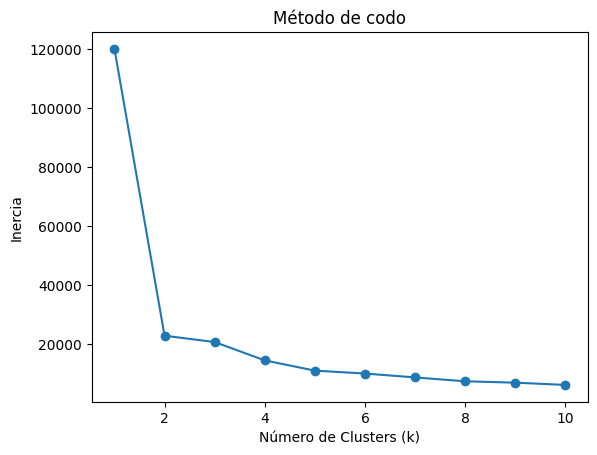

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

# Datos sintéticos.
np.random.seed(42)
X = np.vstack([
    np.random.normal(loc = [20, 30], scale = 5, size = (100, 2)),
    np.random.normal(loc = [50, 60], scale = 10, size = (100, 2))
])

# Calcular inercia para k=1 a 10
inercia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X)
    inercia.append(kmeans.inertia_)

# Graficar
plt.plot(range(1, 11), inercia, marker = 'o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método de codo')

plt.show()

El codo está en **k=2** (óptimo para estos datos).

Usa los datos de clientes del e-commerce:

In [ ]:
ingresos = np.random.randint(15, 100, 500)
puntuacion = np.random.randint(1, 100, 500)
X = np.column_stack([ingresos, puntuacion])

1. Aplica el método del codo para determinar el **k** óptimo.
2. ¿Qué **k** eligirías? ¿Por qué?

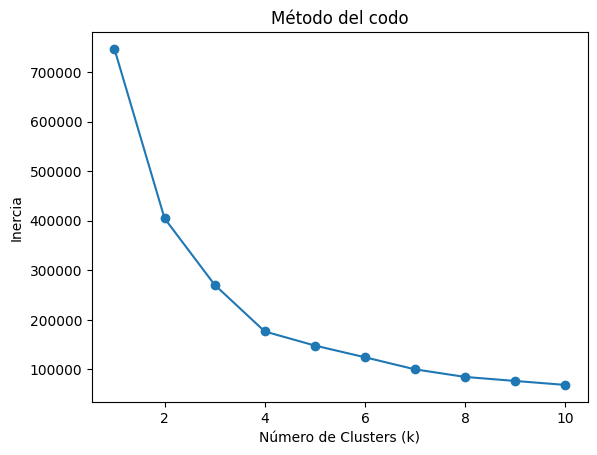

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

ingresos = np.random.randint(15, 100, 500)
puntuacion = np.random.randint(1, 100, 500)

X = np.column_stack([ingresos, puntuacion])

inercia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X)
    inercia.append(kmeans.inertia_)

plt.plot(range(1, 11), inercia, marker = 'o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo')

plt.show()